# Manuel Romero García
## Máster en Big Data y Data Science UCM
### Práctica Estadística

## Cargar y explorar dataset

In [1]:
import pandas as pd
df = pd.read_excel("datasets/EVALMASTER.xlsx")
df

,Grupo de control,Nivel glucosa basal,Nivel glucosa 60 min
0,1,90,159
1,1,82,151
2,1,80,148
3,1,75,138
4,1,74,141
...,...,...,...
60,2,95,169
61,2,99,172
62,2,88,173
63,2,84,188


In [2]:
df.dtypes
# Como son todos números enteros, debemos cambiar el grupo de control, para que no haya confusiones

Grupo de control        int64
Nivel glucosa basal     int64
Nivel glucosa 60 min    int64
dtype: object

In [3]:
# Dividimos el grupo de control en jóvenes (<30 años) y adultos (>30 años)
import numpy as np
df["Grupo de control"] = np.where(df["Grupo de control"] == 1, "<30", ">30")
df["Grupo de control"].unique()

array(['<30', '>30'], dtype=object)

## Ejercicio 1

### a) Obtener las medidas de centralización y dispersión para cada uno de los dos grupos de control para el nivel de glucosa basal, especificando para cada uno de los casos si la media es o no representativa

#### Medidas de centralización

In [9]:
# definimos la moda porque no viene incluida en el módulo "agg" de pandas
from scipy import stats
def mode(x):
    return stats.mode(x)

df[["Nivel glucosa basal", "Grupo de control"]].groupby("Grupo de control").agg(['mean', 'median', mode])

Nivel glucosa basal                    
                                mean median         mode
Grupo de control                                        
<30                        84.685714   82.0  ([75], [3])
>30                        89.400000   90.0  ([88], [4])

#### Ambos grupos tienen medias relativamente similares y su mediana está  cerca de la media, la primera ligeramente por debajo (lo que indica que la distribución está escorada a la izquierda), y la segunda ligeramente por encima (lo que indica lo contrario). Ambos tiene una moda cercana a la media, aunque en los jóvenes está algo por debajo, lo que vuelve a confirmar su distribución escorada. En el grupo de adultos, la moda se repite algo más que en los jóvenes (4 veces frente a 3)

#### Medidas de dispersión

In [10]:
# Hacemos el equivalente con el coeficiente de variación, el rango y el rango intercuartílico. La variable "mad" hace referencia a la desviación absoluta de la media
def cv(x):
    return stats.variation(x)

def rango(x):
    return max(x) - min(x)

def rango_intercuart(x):
    return (np.quantile(x, 0.75) - np.quantile(x, 0.25))

df[["Nivel glucosa basal", "Grupo de control"]].groupby("Grupo de control").agg(['var', 'std', cv, rango, rango_intercuart, 'mad'])

Nivel glucosa basal                            \
                                 var       std        cv rango   
Grupo de control                                                 
<30                        78.221849  8.844312  0.102934    38   
>30                        53.972414  7.346592  0.080795    27   

                                             
                 rango_intercuart       mad  
Grupo de control                             
<30                          12.0  7.430204  
>30                           9.5  5.773333

#### El primer grupo parece tener una mayor dispersión que el segundo en todos los parámetros, pero tampoco podemos decir que esta sea muy elevada en ningún caso. El CV es inferior al 0.30 en ambos casos, por lo que podemos decir que las muestras son representativas, partiendo siempre de que han sido recogidas mediante muestreo aleatorio

### b) Estudiar la simetría y la curtosis del nivel de glucosa basal en los adultos ( grupo de control 2)

In [15]:
x = df.loc[df["Grupo de control"] == ">30"]["Nivel glucosa basal"]

print(f"Curtosis en los adultos: {stats.kurtosis(x)}")
print(f"Asimetría en los adultos: {stats.skew(x)}")

Curtosis en los adultos: -0.7087558433756853
Asimetría en los adultos: -0.0070902831171634545


#### Parece que la distribución en los adultos es aplanada (g < 0) y está muy ligeramente escorada a la derecha

#### Lo comprobamos gráficamente comparándola con una normal *y*, la cual vendrá definida por:

$y \sim \mathcal{N}(\bar{x}, s_x)$

$n_y = n_x$

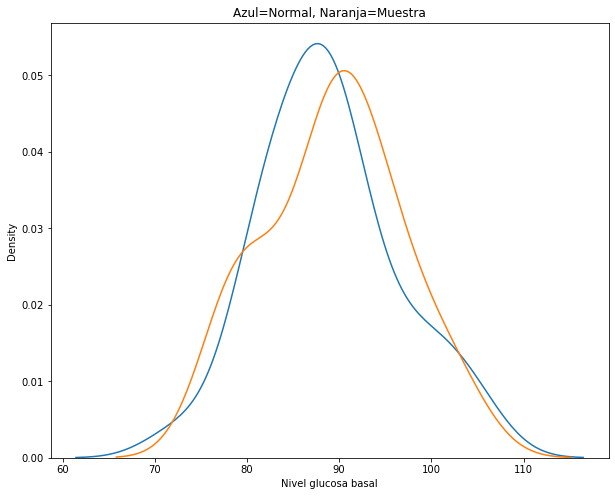

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
# definimos una distribución normal con media igual a la muestra y desviación típica igual a la desviación típica muestral de esta 
# Por eso, al calcular la desviación, establecemos cuántos son los grados de libertad (n - ddof)
y = np.random.normal(loc=np.mean(x), scale=np.std(x, ddof=1), size=len(x))
plt.figure(figsize=(10, 8))
sns.kdeplot(x=y)
sns.kdeplot(x=x)
plt.title("Azul=Normal, Naranja=Muestra");

### c) Indicar para cada una de las variables de estudio y en el grupo de control 1 el valor de los cuartiles y su significado y obtener el boxplot ( diagrama de cajas) correspondiente. Estudiar la presencia de valores atípicos.

#### Cuartiles

In [18]:
def cuartil1(x): 
    return np.quantile(x, 0.25)
    
def cuartil2(x): 
    return np.quantile(x, 0.5)

def cuartil3(x): 
    return np.quantile(x, 0.75)
    
x = df.loc[df["Grupo de control"] == "<30"]

x.groupby("Grupo de control").agg([cuartil1, cuartil2, cuartil3])

Nivel glucosa basal                   Nivel glucosa 60 min  \
                            cuartil1 cuartil2 cuartil3             cuartil1   
Grupo de control                                                              
<30                             78.5     82.0     90.5                146.5   

                                    
                 cuartil2 cuartil3  
Grupo de control                    
<30                 150.0    154.5

#### el 50% de los datos de los jóvenes se encuentran concentrados entre los valores 78.5 y 90.5 en el nivel basal y entre los 146.5 y los 154.5 miligramos al pasar la hora, por lo que ha habido un aumento considerable de la glucosa

#### Boxplot

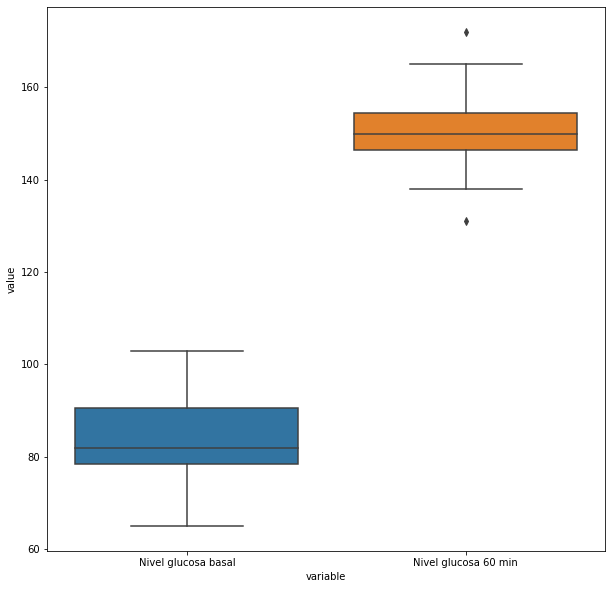

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.boxplot(data=pd.melt(x.drop("Grupo de control", axis = 1)), x="variable", y="value");

#### Observamos algunos valores atípicos el en nivel de glucosa al pasar 60 min, tanto por debajo (<140g) como por encima (>170g) de los "bigotes", por lo que hay algunos individuos jóvenes donde se concentra mucho más la glucosa que en otros, y viceversa. Vamos a observar cuáles son:

In [20]:
x.sort_values("Nivel glucosa 60 min", ascending=False).head()

,Grupo de control,Nivel glucosa basal,Nivel glucosa 60 min
6,<30,103,172
21,<30,89,165
17,<30,100,161
24,<30,99,160
32,<30,97,159


In [21]:
x.sort_values("Nivel glucosa 60 min", ascending=False).tail()

,Grupo de control,Nivel glucosa basal,Nivel glucosa 60 min
22,<30,76,144
4,<30,74,141
11,<30,77,141
3,<30,75,138
8,<30,65,131


#### Parece que los valores se desvían poco del segundo boxplot, ya que tan sólo hay un valor que supera los 170mg y dos que no alcanzan los 140mg

### d) Estudiar la normalidad de los datos de cada uno de los grupos de control estudiados para el nivel de glucosa pasados 60 minutos.

#### Observamos el tamaño de las muestras para ver qué test realizamos

In [22]:
x = df[["Nivel glucosa 60 min", "Grupo de control"]]
x.groupby("Grupo de control").count()

,Nivel glucosa 60 min
Grupo de control,
<30,35
>30,30


#### Como n < 50 para cada grupo, lo mejor es hacer la prueba de Shapiro-Wilk, que asume como hipótesis nula que la distribución es normal:

$H_0: X \sim \mathcal{N}(\mu, \sigma)$

$H_1: X \nsim \mathcal{N}(\mu, \sigma)$

In [23]:
a = stats.shapiro(x.loc[x["Grupo de control"] == "<30"]["Nivel glucosa 60 min"])
b = stats.shapiro(x.loc[x["Grupo de control"] == ">30"]["Nivel glucosa 60 min"])

print(f"Los resultados para el test de Shapiro-Wilk en los jóvenes son estos: {a}")
print(f"Los resultados para el test de Shapiro-Wilk en los adultos son estos: {b}")

Los resultados para el test de Shapiro-Wilk en los jóvenes son estos: ShapiroResult(statistic=0.9626079201698303, pvalue=0.27341291308403015)
Los resultados para el test de Shapiro-Wilk en los adultos son estos: ShapiroResult(statistic=0.9776136875152588, pvalue=0.7591814398765564)


#### Observamos que la prueba no es significativa al 95% (p-value>0.05), por lo que no podemos rechazar la hipótesis de nula de que la distribución de las muestras sigue una normal.
#### No obstante, lo mejor para comprobarlo es realizar un gráfico Q-Q y observar la función de densidad de la distribuciones
#### Naturalmente, en primer lugar, debemos estandarizar los valores de las variables:

$z_i = \frac{x_i - \bar{x}}{s}$

((array([-1.99833768, -1.59452553, -1.35103668, -1.1686393 , -1.01855497,
         -0.8884856 , -0.77194854, -0.66506298, -0.56529149, -0.47085985,
         -0.38045711, -0.29306636, -0.20786198, -0.12414301, -0.04128669,
          0.04128669,  0.12414301,  0.20786198,  0.29306636,  0.38045711,
          0.47085985,  0.56529149,  0.66506298,  0.77194854,  0.8884856 ,
          1.01855497,  1.1686393 ,  1.35103668,  1.59452553,  1.99833768]),
  array([-0.58269148, -0.30161581, -0.16107798, -0.09080906, -0.02054014,
         -0.02054014, -0.02054014,  0.04972877,  0.26053552,  0.40107335,
          0.6118801 ,  0.6118801 ,  0.68214902,  0.82268685,  0.82268685,
          0.82268685,  0.82268685,  0.89295577,  0.96322469,  0.96322469,
          1.24430035,  1.31456927,  1.38483818,  1.4551071 ,  1.52537602,
          1.59564493,  1.66591385,  1.94698952,  2.08752735,  2.57940977])),
 (0.7951933823497835, 0.810975366981301, 0.9905490541038716))

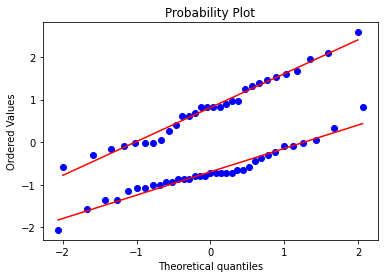

In [24]:
import pylab

#estandarizamos los valores para poder compararlos mejor con una normal
x["valores estandarizados"] = (x["Nivel glucosa 60 min"] - np.mean(x["Nivel glucosa 60 min"]))/np.std(x["Nivel glucosa 60 min"], ddof=1)

# realizamos un qqplot para cada grupo
stats.probplot(x.loc[x["Grupo de control"] == "<30"]["valores estandarizados"], dist="norm", plot=pylab)
stats.probplot(x.loc[x["Grupo de control"] == ">30"]["valores estandarizados"], dist="norm", plot=pylab)

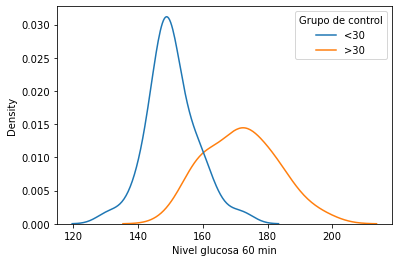

In [25]:
sns.kdeplot(x=x["Nivel glucosa 60 min"], hue=x["Grupo de control"]);

#### En general, los gráficos sugieren que el test es correcto: no parece haber graves problemas en asumir normalidad en las muestras para el nivel de glucosa al pasar 60 min, aunque estén algo lejos de igualar la distribución esperada (45º en el qqplot)

## Ejercicio 2

### a) Estudiar la relación lineal existente entre estas dos variables de estudio

#### Utilizamos el coeficiente de correlación de pearson

In [26]:
# tal y como indica el enunciado, vamos a estudiar únicamente el grupo de jóvenes
x = df.loc[df["Grupo de control"] == "<30"]

stats.pearsonr(x["Nivel glucosa basal"], x["Nivel glucosa 60 min"])

(0.7964052566841132, 1.0560420013792886e-08)

#### Observamos una relación lineal positiva y fuerte entre ambas variables, con un nivel de significatividad superior al 99%

### b) Obtener un modelo lineal que explica el nivel de glucosa en sangre a los 60 minutos en función del nivel basal del paciente y realizar la estimación para un paciente cuyo nivel basal es 83 mg/Dl

#### Realizamos un modelo de regresión  lineal simple, de manera que
$y = \alpha + \beta{x} + \epsilon$

#### donde la predicción de la variable objetivo y viene dada por:

$\hat{y}_i = \alpha + \beta{x_i}$

#### por lo tanto los errores se definen como: 

$\epsilon_i = y_i - \hat{y_i}$

#### tratando de minimizar la siguiente función de pérdida:

$SSR = \sum \limits _{i=1} ^{n}(\epsilon_i)^2$


In [13]:
import statsmodels.api as sm

# es necesario separar las variables independientes de la dependiente y añadir una constante para las primeras
X = sm.add_constant(x["Nivel glucosa basal"])

Y = x["Nivel glucosa 60 min"]

model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Nivel glucosa 60 min   R-squared:                       0.634
Model:                              OLS   Adj. R-squared:                  0.623
Method:                   Least Squares   F-statistic:                     57.23
Date:                  Wed, 30 Nov 2022   Prob (F-statistic):           1.06e-08
Time:                          11:44:41   Log-Likelihood:                -103.17
No. Observations:                    35   AIC:                             210.3
Df Residuals:                        33   BIC:                             213.5
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  91.3837      7.843     11.652      0.000      75.428     107.339
Nivel glucosa basal     0.6969      0.092      7.565      0.000       0.509       0.884
==============================================================================
Omnibus:                        1.394   Durbin-Watson:                   1.615
Prob(Omnibus):                  0.498   Jarque-Bera (JB):                1.175
Skew:                           0.433   Prob(JB):                        0.556
Kurtosis:                       2.765   Cond. No.                         832.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Obtenemos el siguiente modelo:

$Nivel glucosa 60min = 91.3837 + Nivel glucosabasal*0.6969$

In [14]:
91.3837 + 83*0.6969

149.2264

#### El modelo lineal nos dice que por cada gramo de glucosa inicial, el nivel a los 60 minutos aumentará en casi 0.70g, por lo que un sujeto cuyo nivel inicial sea de 83g, tendrá un nivel esperado de unos 149.23g cuando pase una hora. 

#### Es razonable comprobar si el modelo cumple con los supuestos de normalidad y homocedasticidad, para ello creemos que lo más rápido es visualizar los datos de los residuos:
* $\epsilon \sim \mathcal{N}(0, \sigma)$
* $Var(\epsilon) = \sigma^2$ $\forall$  $i...n$

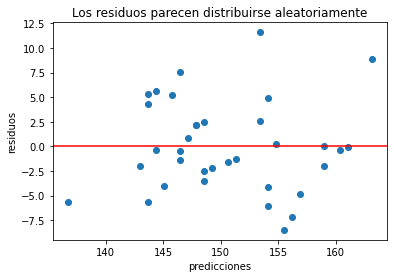

In [90]:
plt.scatter(model.predict(X), model.resid)
plt.axhline(np.mean(model.resid), color="red")
plt.title("Los residuos parecen distribuirse aleatoriamente")
plt.xlabel("predicciones")
plt.ylabel("residuos");

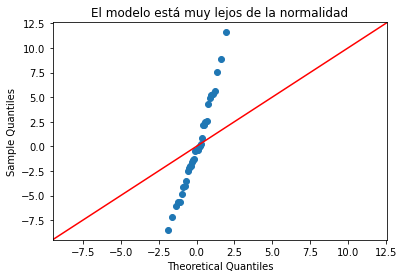

In [91]:
sm.qqplot(model.resid, line ='45')
plt.title("El modelo está muy lejos de la normalidad");

#### Ahora vamos a observar si podemos asumir que la relación es lineal:

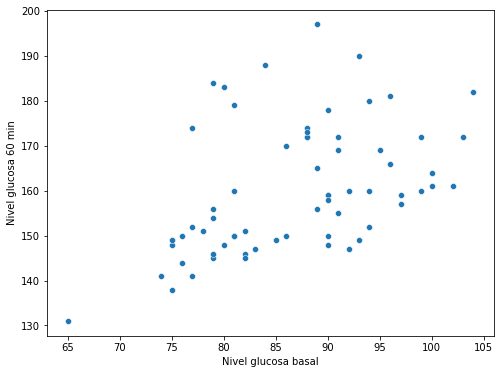

In [139]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Nivel glucosa basal", y="Nivel glucosa 60 min");

#### El modulo no es muy robusto, ya que, aunque parece que la varianza es constante, los residuos estándares no parecen seguir una distribución normal. Con respecto a la linealidad, resulta difícil observar otro patrón, así que es razonable elegir este modelo en lugar de otros polinomiales más complejos

### c) ¿Qué tanto por ciento del nivel de glucosa en sangre pasados 60 minutos queda no queda explicado por el anterior modelo?

#### dado que el R cuadrado es 0.634, el porcentaje de varianza no explicado será del 36,4% (100*(1 - 0.634)), lo que indica que el modelo explica moderadamente el nivel basal a los 60 minutos, posiblemente porque existan otras variables influyentes, como el tipo de dieta u otras enfermedades. Si queremos generalizar el modelo a la población, el porcentaje de varianza no explicado ascenderá al 37,7% (R cuadrado ajustado del 0.623).

### d) Si aumentásemos el nivel basal de un paciente en 5 mg/Dl ¿Qué variación experimentaría su nivel de glucosa al cabo de 60 minutos?

In [92]:
5*0.6969

3.4844999999999997

#### Su nivel basal aumentaría en torno a 3.49 miligramos 

## Ejercicio 3.

### a) Se quiere estudiar si se puede admitir que el nivel medio de glucosa en sangre en el momento de la ingestión en los jóvenes es 88 mg/Dl. Obtener el intervalo de confianza al 95% y al 99% para el nivel medio de glucosa en sangre de los jóvenes y posteriormente contesta a la cuestión planteada con los resultados obtenidos o con un contraste de hipótesis.

#### cálculo de intervalos

#### En primer lugar, debemos ver si podemos asumir que las variables siguen una distribución normal, así que tenemos que comprobar este supuesto

In [27]:
x = df.loc[df["Grupo de control"] == "<30"]["Nivel glucosa basal"]

a = stats.shapiro(x)
print(f"Los resultados para el test de Shapiro-Wilk en los jóvenes en el nivel basal son estos: {a}")

Los resultados para el test de Shapiro-Wilk en los jóvenes en el nivel basal son estos: ShapiroResult(statistic=0.9678659439086914, pvalue=0.3873666524887085)


#### Como no podemos rechazar la hipótesis nula, asumimos que sigue una distribución normal 

In [28]:
a = stats.t.interval(alpha=0.95, df=len(x)-1, loc=np.mean(x), scale=stats.sem(x)) 

b = stats.t.interval(alpha=0.99, df=len(x)-1, loc=np.mean(x), scale=stats.sem(x)) 

print(f"el intervalo de confianza al 95% de nivel de glucosa basal para la media en los jóvenes es {a}")
print(f"el intervalo de confianza al 99% de nivel de glucosa basal para la media en los jóvenes es {b}")

el intervalo de confianza al 95% de nivel de glucosa basal para la media en los jóvenes es (81.64758693301904, 87.72384163840952)
el intervalo de confianza al 99% de nivel de glucosa basal para la media en los jóvenes es (80.60686967940265, 88.76455889202592)


#### Si asumimos un nivel de confianza del 99%, entonces podemos decir que en la población de jóvenes, la media podría ser de 88mg, no obstante, si asumimos un nivel de confianza del 95%, debemos rechazar esta hipótesis

#### El test t para dos muestras tiene como hipótesis nula que la media de dos distribuciones son iguales:

$H_0: \mu_x = \mu_y$

$H_1: \mu_x \neq \mu_y$

#### Para responder a la pregunta anterior, creamos una variable *y* que siga una normal de media 88 y desviación típica igual a la desviación típica muestral de la variable x (asumiendo que *y* es la población de la que se ha escogido *x*). Se ha escogido como tamaño de población  n=10000. Esto se justifica porque en la librería *scipy*, al realizar el t test, debemos utilizar necesariamente un vector columna en los argumentos de la función.

$y \sim \mathcal{N}(88, s_x)$

$n_y = 10000$

In [29]:
y = np.random.normal(loc=88, scale=np.std(x, ddof=1), size=10000)

# equal_var es importante, ya que indica que asumimos varianzas iguales (sino estaríamos realizando un test de Welch)
# Este y el resto de tests son de dos colas, la versión por defecto de la función en scipy
stats.ttest_ind(x, y, equal_var=True)

Ttest_indResult(statistic=-2.22324389099725, pvalue=0.026221548832707223)

#### los resultados del t-test confirman nuestro comentario anterior

### b) Obtener los intervalos de confianza al 95% y al 99 % para la diferencia de medias en el nivel basal de glucosa entre adultos y jovenes e interpreta los resultados. ¿Se puede concluir que el nivel basal de glucosa de los jóvenes y los adultos es el mismo? ¿Se cumplen las hipótesis iniciales para determinar los intervalos de confianza?

#### Antes de nada, debemos comprobar si podemos asumir que las variables son normales y tienen la misma varianza

In [30]:
x = df.loc[df["Grupo de control"] == "<30"]["Nivel glucosa basal"] 
y = df.loc[df["Grupo de control"] == ">30"]["Nivel glucosa basal"]

a = stats.shapiro(x)
b = stats.shapiro(y)

print(f"Los resultados para el test de Shapiro-Wilk en los jóvenes en el nivel basal son estos: {a}")
print(f"Los resultados para el test de Shapiro-Wilk en los adultos en el nivel basal son estos: {b}")

Los resultados para el test de Shapiro-Wilk en los jóvenes en el nivel basal son estos: ShapiroResult(statistic=0.9678659439086914, pvalue=0.3873666524887085)
Los resultados para el test de Shapiro-Wilk en los adultos en el nivel basal son estos: ShapiroResult(statistic=0.9675340056419373, pvalue=0.4740930497646332)


#### La prueba de Levene asume como hipótesis nula la igualdad de varianzas:

$H_0: {\sigma^2}_x = {\sigma^2}_y$

$H_1: {\sigma^2}_x \neq {\sigma^2}_y$


In [31]:
# se ha preferido centrar por la media en lugar de la mediana, ya que lo que tratamos de ver posteriormente es la diferencia de medias
a = stats.levene(x, y, center = 'mean')
print(f"Los resultados para el test de Levene entro los jóvenes y los adultos en el nivel basal son estos: {a}")

Los resultados para el test de Levene entro los jóvenes y los adultos en el nivel basal son estos: LeveneResult(statistic=2.1614996904779904, pvalue=0.14648337567031314)


#### No podemos rechazar la hipótesis nula en ninguno de los test, por lo que no tenemos problema en realizar un test t

#### dado que:

${\sigma^2}_x = {\sigma^2}_y$

$n_x \approx n_y$

#### Obtenemos los intervalos mediante esta fórmula:

$(\bar{x} - \bar{y}) \pm t_{\frac{\alpha}{2}, df} S_p\sqrt{\frac{1}{n_x}+{\frac{1}{n_y}}}$

#### donde

$df = n_x + n_y - 2$

$S_p = \sqrt{\frac{(n_1 - 1){s_x}^2 + (n_2 - 1){s_y}^2}{df}}$

$\alpha = 0.05$

In [32]:
# es posible hacerlo de manera automática con otras librerías (p. ej. pingouin), pero no viene mal un poco de cálculo
S = np.sqrt((((len(x)-1)*np.var(x, ddof=1)) + (len(y)-1)*np.var(y, ddof=1))/(len(df)-2))

# ponemos la diferencia de medias como absoluto para visualizar mejor el intervalo
a = abs(np.mean(x) - np.mean(y)) - stats.t.ppf(0.05/2, len(df) -2)*S*np.sqrt((1/len(x)) + (1/len(y)))
b = abs(np.mean(x) - np.mean(y)) + stats.t.ppf(0.05/2, len(df) -2)*S*np.sqrt((1/len(x)) + (1/len(y)))
c = abs(np.mean(x) - np.mean(y)) - stats.t.ppf(0.01/2, len(df) -2)*S*np.sqrt((1/len(x)) + (1/len(y)))
d = abs(np.mean(x) - np.mean(y)) + stats.t.ppf(0.01/2, len(df) -2)*S*np.sqrt((1/len(x)) + (1/len(y)))

print(f"el intervalo de confianza al 95% de nivel de glucosa basal para la diferencia de medias es {a, b}")
print(f"el intervalo de confianza al 99% de nivel de glucosa basal para la diferencia de medias es {c, d}")

el intervalo de confianza al 95% de nivel de glucosa basal para la diferencia de medias es (8.785850912322415, 0.6427205162490299)
el intervalo de confianza al 99% de nivel de glucosa basal para la diferencia de medias es (10.12610989442638, -0.6975384658549348)


#### Los intervalos de confianza nos indican que podemos asumir que las medias del nivel de glucosa basal de los jóvenes y los adultos son distintas (su diferencia no es cero) si asumimos un nivel de confianza del 95%. En cambio, si asumimos un nivel de confianza del 99%, no podemos rechazar la hipótesis nula y por lo tanto debemos decir que son iguales.

#### Realizamos el T test

$H_0: \mu_x = \mu_y$

$H_1: \mu_x \neq \mu_y$

In [33]:
stats.ttest_ind(x, y, equal_var=True)

Ttest_indResult(statistic=-2.313790350918938, pvalue=0.02395437407383346)

#### El tes t nos indica que la diferencia estimada es de 2.31mg (siendo superior la de los adultos) y que el p-valor es 0.02, naturalmente esto coincide con nuestro cálculo anterior (0.05 > 0.02 > 0.01).

### c) Se quiere estudiar la proporción de la población con un nivel basal de glucosa superior a 95 mg/Dl (prediabetes). A partir de la muestra del fichero (tomando todos los datos) obtener un intervalo de confianza al 98% y contrastar la hipótesis que la proporción de la población con glucosa superior a 95 mg/Dl es 0,15 con nivel de significación del 5%.

#### Cálculo de proporción en la muestra

In [44]:
x = len(df.loc[df["Nivel glucosa basal"] > 95]["Nivel glucosa basal"])/len(df)
print(f"la proporción de la muestra que tiene un nivel de glucosa basal superior a 95mg es de {x}")

la proporción de la muestra que tiene un nivel de glucosa basal superior a 95mg es de 0.16923076923076924


#### Existen muchas pruebas de diferencias en proporciones, nosotros hemos escogido la binomial porque es con la que estamos más familiarizados y la que creemos más intuitiva. Asume como hipótesis nula que la probabilidad es igual a la proporción que le asignamos (0.15 en este caso)

$H_0: p_x = 0.15$

$H_1: p_x \neq 0.15$

In [45]:
a = stats.binomtest(k=len(df.loc[df["Nivel glucosa basal"]> 95]["Nivel glucosa basal"]), n=len(df), p=0.15)
a

BinomTestResult(k=11, n=65, alternative='two-sided', proportion_estimate=0.16923076923076924, pvalue=0.6047971212313175)

#### No podemos rechazar la hipótesis nula de que la proporción de la población con un nivel de glucosa basal superior a 95mg sea del 15% con un nivel de significatividad del 5%

#### Cálculo del nivel de confianza al 98% de las diferencias en proporciones

In [46]:
a.proportion_ci(confidence_level=0.98)

ConfidenceInterval(low=0.07658425742442686, high=0.3042740124538165)

#### El intervalo de confianza del 98% nos muestra, al igual que el test anterior, que con este nivel de significatividad no podemos rechazar la hipótesis nula. También nos sugiere que el intervalo es muy amplio, aunque diferente de cero, por lo que deberíamos tener cuidado a la hora de sugerir la proporción real en la población

### d) *(VOLUNTARIO)* ¿Se detecta una variación significativa del nivel de glucosa en sangre en el grupo de los adultos después de la toma? 
#### Nota: Se pretende comprobar si, como muestran los datos, los niveles de glucosa en sangre son distintos para los adultos en el momento de la ingestión y a los 60 minutos, por ello para contestar a la pregunta has de considerar las series de datos obtenidas a partir de las diferencias entre el nivel basal y el nivel de glucosa al cabo de 60 minutos en el grupo de los adultos (contraste de muestras emparejadas). Plantea el correspondiente contraste de hipótesis considerando un nivel de significación del 5%.

#### Observamos si las muestras siguen una distribución normal y su varianza es similar

In [47]:
x = df.loc[df["Grupo de control"] == ">30"]["Nivel glucosa basal"] 
y = df.loc[df["Grupo de control"] == ">30"]["Nivel glucosa 60 min"]

a = stats.shapiro(x)
b = stats.shapiro(y)

print(f"Los resultados para el test de Shapiro-Wilk en los adultos en el nivel basal son estos: {a}")
print(f"Los resultados para el test de Shapiro-Wilk en los adultos pasada un hora son estos: {b}")

Los resultados para el test de Shapiro-Wilk en los adultos en el nivel basal son estos: ShapiroResult(statistic=0.9675340056419373, pvalue=0.4740930497646332)
Los resultados para el test de Shapiro-Wilk en los adultos pasada un hora son estos: ShapiroResult(statistic=0.9776136875152588, pvalue=0.7591814398765564)


In [48]:
a = stats.levene(x, y, center = 'mean')
print(f"Los resultados para el test de Levene entre los niveles basales iniciales y pasados son estos: {a}")

Los resultados para el test de Levene entre los niveles basales iniciales y pasados son estos: LeveneResult(statistic=3.966959152016377, pvalue=0.05111719375735523)


#### Ambas muestras parecen comportarse como una normal según el test (No podemos rechazar la hipótesis nula, pvalor>0.95) y tampoco podemos rechazar que sus varianzas sean iguales si asumimos un nivel de confianza del 95% (pvalor>0.05). 
#### Procedemos a realizar el Test t para muestras emparejadas para comprobar si realmente los niveles de glucosa han cambiado. 

$H_0: \mu_x = \mu_y$

$H_1: \mu_x \neq \mu_y$

In [191]:
# El t test para muestras pareadas (_rel) asume varianzas iguales siempre
stats.ttest_rel(y, x)

Ttest_relResult(statistic=34.374098926722965, pvalue=4.712941398225408e-25)

#### Podemos rechazar la hipótesis nula de que ambas muestras son iguales con más de un 99.99% de confianza y estimar su diferencia en 34.37mg, siendo superior pasados los 60 minutos